In [1]:
file = 'data/attendance_area_report.pdf'


In [3]:


import pdfplumber
import pandas as pd

with pdfplumber.open(file) as pdf:
    for page in pdf.pages:
        tables = page.extract_table()
        if tables:
            df = pd.DataFrame(tables[1:], columns=tables[0])
            print(df)


  Where the Students Living in the\nWhere Students Attending\nDunlap Attendance Area\nDunlap Live\nAttend School\nAttendance Area Total School Total\nDunlap 179 Dunlap 179\nEmerson 14 South Shore PK-8 52\nOut of District/Unknown 9 Orca K-8 12\nRainier View 6 Rising Star 9\nMartin Luther King 4 Martin Luther King 6\nKimball 2 Wing Luke 5\nRising Star 2 Graham Hill 3\nGraham Hill 1 Maple 3\nJohn Muir 1 Queen Anne 3\nLeschi 1 STEM K-8 3\nGrand Total 219 Thurgood Marshall 3\nDearborn Park Intl 2\nEmerson 2\nHawthorne 2\nKimball 2\nTOPS K-8 2\nBailey Gatzert 1\nBeacon Hill Intl 1\nLeschi 1\nMadrona 1\nRainier View 1\nRoxhill 1\nGrand Total 294  \
0                                               None                                                                                                                                                                                                                                                                                                          

In [5]:
import fitz  # PyMuPDF
import pandas as pd

# Open the PDF file
pdf_document = file
document = fitz.open(pdf_document)

# Extract text from each page
text = ""
for page_num in range(len(document)):
    page = document.load_page(page_num)
    text += page.get_text()

# Process the extracted text to form a DataFrame (assuming the text is structured as a table)
# This step will depend heavily on the structure of your PDF
data = []
for line in text.split("\n"):
    data.append(line.split())

df = pd.DataFrame(data)
print(df)


           0           1           2       3     4     5     6     7     8   \
0        None        None        None    None  None  None  None  None  None   
1        None        None        None    None  None  None  None  None  None   
2      Annual  Enrollment      Report    None  None  None  None  None  None   
3     Section           4        None    None  None  None  None  None  None   
4        None        None        None    None  None  None  None  None  None   
...       ...         ...         ...     ...   ...   ...   ...   ...   ...   
7213     West     Seattle        Live    None  None  None  None  None  None   
7214    Where         the    Students  Living    in   the  None  None  None   
7215     West     Seattle  Attendance    Area  None  None  None  None  None   
7216   Attend      School        None    None  None  None  None  None  None   
7217     None        None        None    None  None  None  None  None  None   

        9     10    11    12    13    14    15    1

In [2]:
import camelot
# Read PDF file
tables = camelot.read_pdf(file, pages='all')
# Export to CSV or directly to a DataFrame
for table in tables:
    print(table.df)


ImportError: cannot import name 'TableList' from 'camelot.core' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/camelot/core/__init__.py)

In [2]:
import tabula
# Read PDF file
df = tabula.read_pdf(file, pages='all')
print(df)


Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'
Got stderr: May 24, 2024 2:20:07 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
May 24, 2024 2:20:07 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
May 24, 2024 2:20:08 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



[  Where the Students Living in the\rWhere Students Attending\rDunlap Attendance Area\rDunlap Live\rAttend School\rAttendance AreaTotalSchoolTotal\rDunlap179Dunlap179\rEmerson14South Shore PK-852\rOut of District/Unknown9Orca K-812\rRainier View6Rising Star9\rMartin Luther King4Martin Luther King6\rKimball2Wing Luke5\rRising Star2Graham Hill3\rGraham Hill1Maple3\rJohn Muir1Queen Anne3\rLeschi1STEM K-83\rGrand Total219Thurgood Marshall3\rDearborn Park Intl2\rEmerson2\rHawthorne2\rKimball2\rTOPS K-82\rBailey Gatzert1\rBeacon Hill Intl1\rLeschi1\rMadrona1\rRainier View1\rRoxhill1\rGrand Total294  \
0                               Attendance AreaTotal                                                                                                                                                                                                                                                                                                                                                         

In [33]:
df[1].columns[0].split('\r')

['Where the Students Living in the',
 'Where Students Attending',
 'Emerson Attendance Area',
 'Emerson Live',
 'Attend School',
 'Attendance AreaTotalSchoolTotal',
 'Emerson247Emerson247',
 'Rainier View19South Shore PK-888',
 'Martin Luther King5Orca K-817',
 'Out of District/Unknown4Dunlap14',
 'Graham Hill3Thurgood Marshall11',
 'Dunlap2Wing Luke10',
 'Kimball2Queen Anne8',
 'Roxhill2Rainier View8',
 'Hawthorne1Dearborn Park Intl7',
 'Wing Luke1Graham Hill5',
 'Grand Total286STEM K-85',
 'Rising Star4',
 'TOPS K-84',
 'Hawthorne3',
 'Martin Luther King3',
 'John Muir2',
 'Cascade Parent Partnership1',
 'Hazel Wolf K-81',
 'In Tandem1',
 'John Stanford Intl1',
 'Maple1',
 'Grand Total441']

In [3]:
for i in range(168,169):
    print(i)

168


In [34]:
import numpy as np

# Small dataset
data = np.array([1, 3, 0, 5])
n = len(data)
B = 1000  # Number of bootstrap samples

# Function to calculate bootstrap samples and statistics
def bootstrap(data, B):
    n = len(data)
    bootstrap_means = np.zeros(B)
    
    for i in range(B):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    
    return bootstrap_means

# Generate bootstrap samples and calculate means
bootstrap_means = bootstrap(data, B)

# Calculate 95% confidence intervals using the percentile method
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

mean_estimate = np.mean(bootstrap_means)
print(f"Mean Estimate: {mean_estimate}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")


Mean Estimate: 2.28275
95% Confidence Interval: [0.5, 4.5]


In [29]:
n = len(data)
bootstrap_means = np.zeros(B)
    
bootstrap_sample = np.random.choice(data, size=n, replace=True)
print(bootstrap_sample)
print(np.mean(bootstrap_sample))

[3 1 3 3 0]
2.0


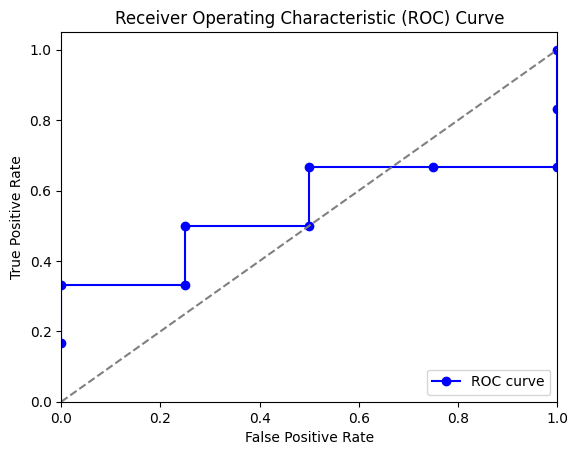

In [35]:
import matplotlib.pyplot as plt

# FPR and TPR values from above
fpr = [0.0, 0.0, 0.25, 0.25, 0.5, 0.5, 0.75, 1.0, 1.0, 1.0]
tpr = [0.167, 0.333, 0.333, 0.5, 0.5, 0.667, 0.667, 0.667, 0.833, 1.0]

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [38]:
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
import pickle
import os

SCOPES = ['https://www.googleapis.com/auth/drive.metadata.readonly']

def main():
    flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
    creds = flow.run_local_server(port=8080)
    
    with open('token.pickle', 'wb') as token:
        pickle.dump(creds, token)
    print("Credentials saved to token.pickle")

if __name__ == '__main__':
    main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=979507959672-5td76htqq2rm8d6gruh8lbu2ifujtbaj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.metadata.readonly&state=kOdPXTTQHDPWgtCCmQvPp89oFLKSeE&access_type=offline
Credentials saved to token.pickle
